<a href="https://colab.research.google.com/github/jvjnagar/ImageProcessing/blob/Notebook/image_processing_and_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


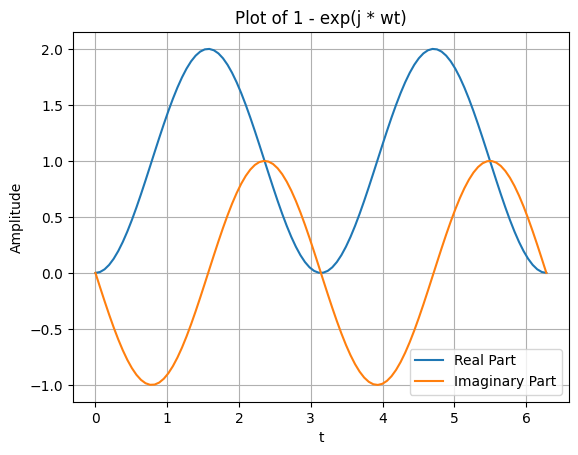

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of t values
t = np.linspace(0, 2*np.pi, 100)

# Define the frequency w
w = 2

# Calculate the complex exponential function
z = 1 - np.exp(1j * w * t)

# Extract the real and imaginary parts
real_part = np.real(z)
imaginary_part = np.imag(z)

# Plot the real and imaginary parts
plt.plot(t, real_part, label='Real Part')
plt.plot(t, imaginary_part, label='Imaginary Part')
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.title('Plot of 1 - exp(j * wt)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import cv2
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

[[ 0 -1  0]
 [-1  4 -1]
 [ 0 -1  0]]


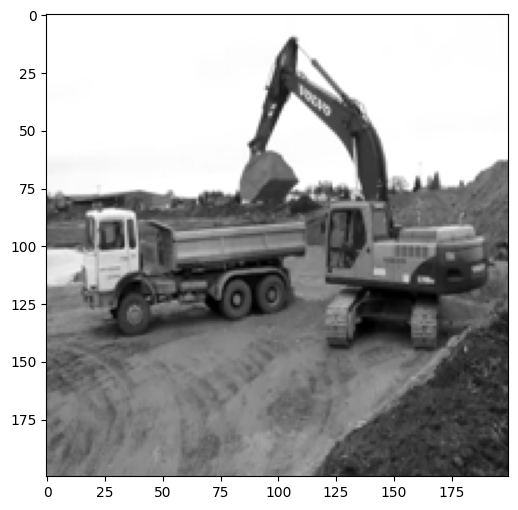

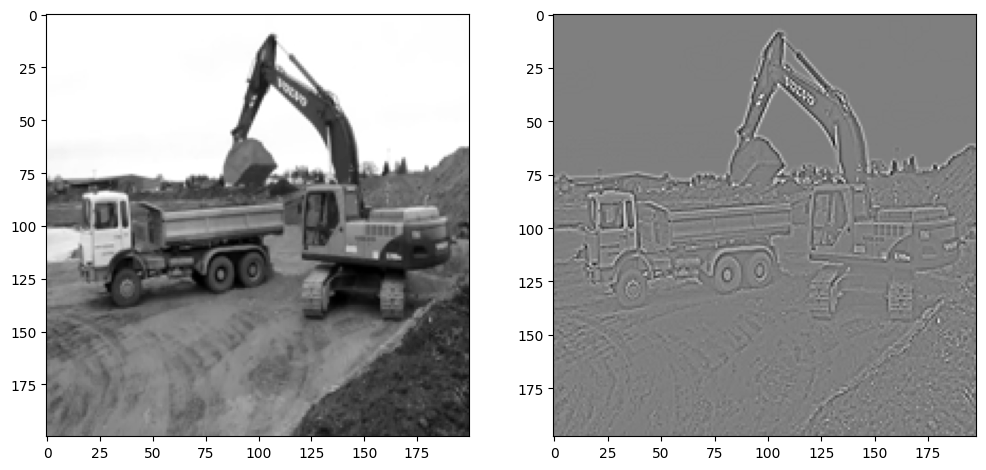

In [ ]:
## implementing onvolution filterBank
sharpen = np.array([[0, -1, 0],
                    [-1, 4, -1],
                    [0, -1, 0]])

print(sharpen)

img1 = np.array([[1, 1, 6, 5, 1, 1],
                [1, 1, 8, 9, 1, 1],
                [1, 1, 2, 11, 1, 1],
                [1, 1, 12, 6, 1, 1],
                [1, 1, 7, 3, 1, 1],
                [1, 1, 1, 2, 1, 1]])

path = '/content/drive/MyDrive/sample_data_resizing/000001.jpg'

img = Image.open(path)
img = ImageOps.grayscale(img)

img = img.resize(size= (200, 200))
img = np.array(img)

plt.figure(figsize=(6,6))
plt.imshow(img, cmap='gray')
def convolve(img, kernel, img_size, kernel_size):
  target_img_size = img_size - kernel_size + 1
  conv_img = np.zeros(shape=(target_img_size, target_img_size))
  for i in range(target_img_size):
    for j in range(target_img_size):
      mat = img[i:i+kernel_size, j:j+kernel_size]
      conv_img[i, j] = np.sum(np.multiply( mat, kernel))
  return conv_img

img_out = convolve(img, sharpen, 200, 3)
_, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img, cmap='gray')
ax[1].imshow(img_out, cmap='gray')

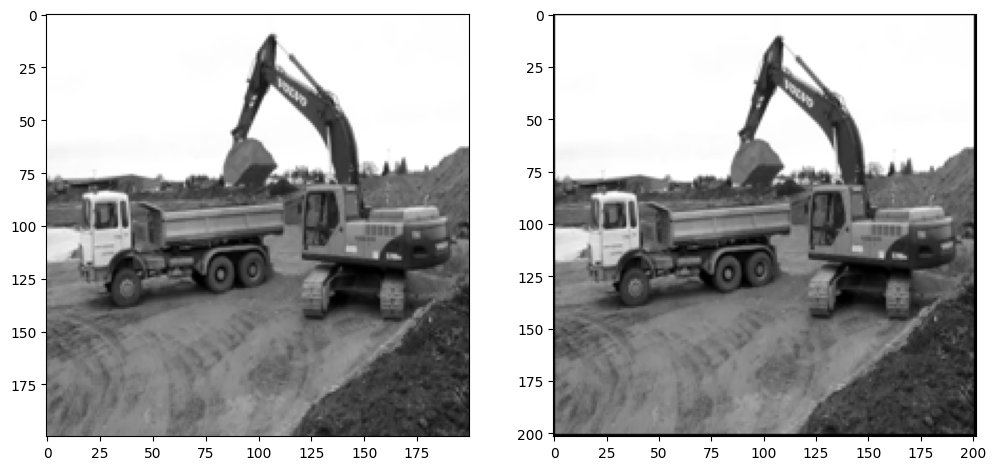

In [ ]:
#### pading  ###
def padding(img, kernel):
  img_size = img.shape[0]
  kernel_size = kernel.shape[0]
  padding = kernel_size//2
  img_with_pad_size = img_size + padding*2
  padded_img = np.zeros(shape=(img_with_pad_size, img_with_pad_size))

  padded_img[padding:img_size+padding, padding:img_size+padding] = img
  return padded_img

padded_img = padding(img, sharpen)
_, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].imshow(img, cmap='gray')
ax[1].imshow(padded_img, cmap='gray')

Approach: The approach is based on the pattern made by indices after rotating the matrix. Consider the following illustration to have a clear insight into it.

Consider a 3 x 3 matrix having indices (i, j) as follows.

00 01 02
10 11 12
20 21 22

After rotating the matrix by 90 degrees in clockwise direction, indices transform into
20 10 00  current_row_index = 0, i = 2, 1, 0
21 11 01 current_row_index = 1, i = 2, 1, 0
22 12 02  current_row_index = 2, i = 2, 1, 0

ref: https://www.geeksforgeeks.org/rotate-a-matrix-by-90-degree-in-clockwise-direction-without-using-any-extra-space/

In [ ]:
#### matrix rotaion ###
#### roation by 90 degree

arr = [[ 1, 2, 3,14],
       [ 4, 5, 6,15],
       [ 7, 8, 9,16],
       [10,11,12,17]]

# arr = [[ 1, 2, 3],
#        [ 4, 5, 6],
#        [ 7, 8, 9]]

mat = np.array(arr)

print(mat, end= "\n")

def rotate90D_clock(mat):
  out_mat = mat.copy()
  N = mat.shape[0]
  for i in range(N):
    for j in range(N):
      out_mat[i][j] = mat[N-j-1][i]
  return out_mat

out_mat = rotate90D_clock(mat)
print(out_mat)

##### rotate matrix by 180 degree #####
def rotate180D_clock(mat):
  out_mat = mat.copy()
  N = mat.shape[0]
  k = 0
  for j in range(N):
    for i in range(N):
      out_mat[N-i-1][N-j-1] = mat[i][j]
  return out_mat

out_mat180 = rotate180D_clock(mat)
print(out_mat180)

[[ 1  2  3 14]
 [ 4  5  6 15]
 [ 7  8  9 16]
 [10 11 12 17]]
[[10  7  4  1]
 [11  8  5  2]
 [12  9  6  3]
 [17 16 15 14]]
[[17 12 11 10]
 [16  9  8  7]
 [15  6  5  4]
 [14  3  2  1]]


Linear regression::

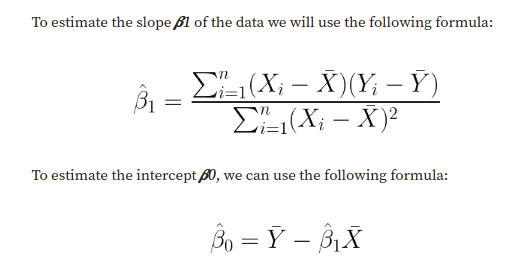

ref: https://towardsdatascience.com/simple-linear-regression-in-python-numpy-only-130a988c0212

In [ ]:
##### Linear regression ###
df_train = pd.read_csv("/content/sample_data/california_housing_train.csv")

df_train = df_train.head(100)
x = df_train['total_rooms']
y = df_train['median_house_value']

def linear_regression(x, y):
  N = len(x)
  x_mean = x.mean()
  y_mean = y.mean()

  B1_nume = ((x-x_mean)*(y-y_mean)).sum()
  B1_deno = ((x-x_mean)**2).sum()

  B1 = B1_nume/B1_deno

  B0 = y_mean - B1*x_mean
  print('Best fit line to data is y = {} + {}x '.format(round(B0,3),round(B1,3)))
  return(B1,B0)

B1, B0 = linear_regression(x, y)

Best fit line to data is y = 69432.702 + 2.022x 


In [ ]:
####relative squred error ###
def relative_square_error(x,y, B1, B0):
  RSE_nume = ((y-(B0 + B1*x))**2).sum()
  RSE_deno = ((y-y.mean())**2).sum()
  RSE = RSE_nume / RSE_deno
  R_square = 1-RSE
  R = np.sqrt(R_square)
  return RSE, R

RSE, R = relative_square_error(x,y, B1, B0)  #Correlation Coefficient (R)
print(R)

#another formula to get R value
def corr_coef(x, y):
    N = len(x)

    num = (N * (x*y).sum()) - (x.sum() * y.sum())
    den = np.sqrt((N * (x**2).sum() - x.sum()**2) * (N * (y**2).sum() - y.sum()**2))
    R = num / den
    return R

0.09531560678359521


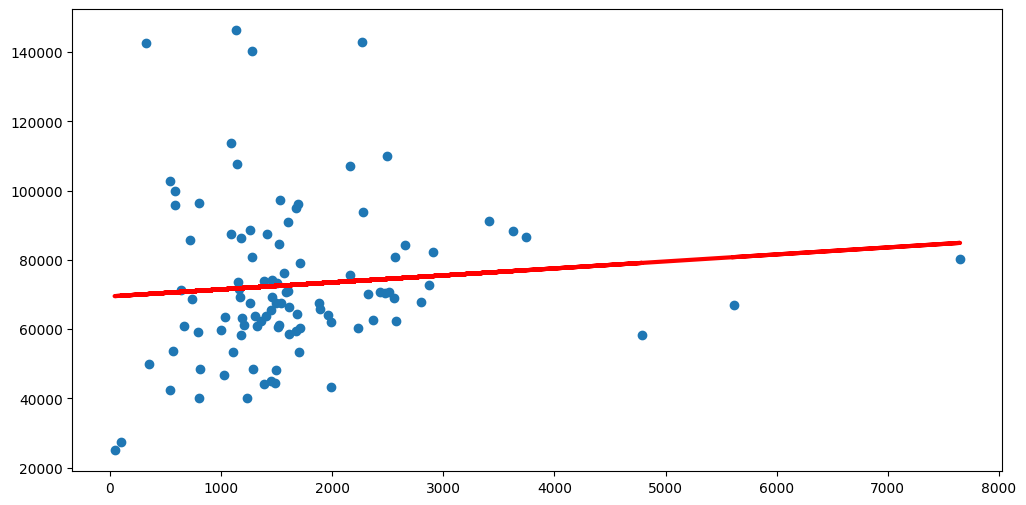

In [ ]:
##### sccatter plot #####
plt.figure(figsize=(12,6))
plt.scatter(x, y,)
plt.plot(x, B0 + B1*x, c = 'r', linewidth=3)

**Canny edge detection**

The Canny edge detection algorithm is composed of 5 steps:

*   Noise reduction;
*   Gradient calculation;
*   Non-maximum suppression;
*   Double threshold;
*   Edge Tracking by Hysteresis.

ref: https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123

In [ ]:
#noise reduction
def gaussian_filter(kernel_size, sigma):
  size = kernel_size//2
  x, y = np.mgrid[-size:size+1, -size:size+1]
  g = (np.exp(-(x**2+y**2)/2*sigma**2))*(1/(2*np.pi*sigma**2))
  return g

print(gaussian_filter(3, 1))

[[0.05854983 0.09653235 0.05854983]
 [0.09653235 0.15915494 0.09653235]
 [0.05854983 0.09653235 0.05854983]]


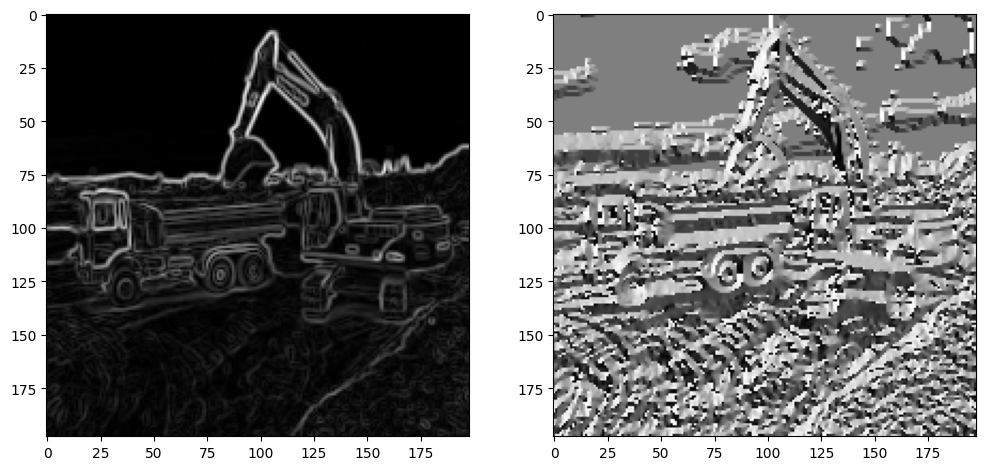

In [ ]:
def sobel(img):
  Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
  Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
  Ix = convolve(img, Kx, img.shape[0], 3)
  Iy = convolve(img, Ky, img.shape[0], 3)

  #maginitude
  #G = np.hypot(Ix, Iy)
  G = np.sqrt(np.add(Ix**2, Iy**2))
  G = G/G.max()*255

  theta = np.arctan2(Iy, Ix)
  return G, theta

G, theta = sobel(img)
_, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].imshow(G, cmap='gray')
ax[1].imshow(theta, cmap='gray')

**Non max supression**

* Create a matrix initialized to 0 of the same size of the original gradient intensity matrix;

* Identify the edge direction based on the angle value from the angle matrix;

* Check if the pixel in the same direction has a higher intensity than the pixel that is currently processed;

* Return the image processed with the non-max suppression algorithm.

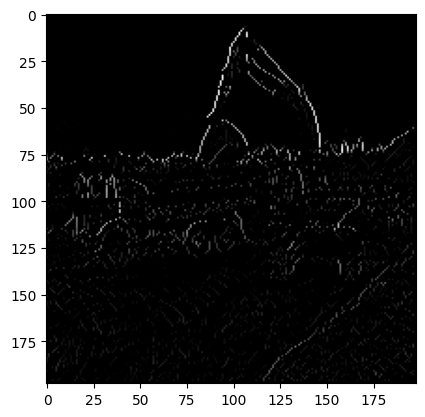

In [ ]:
from matplotlib.projections.polar import ThetaFormatter
def non_max_suppresion(G, theta):
  M, N = G.shape
  Img_nms = np.zeros(shape=(M,N))
  for i in range(M-1):
    for j in range(N-1):
      try:
        m=255
        n=255
        #angle 0
        if (0 <= theta[i,j] < 22.5) or (157.5 <= theta[i,j] <= 180):
            m = G[i, j+1]
            n = G[i, j-1]
        #angle 45
        elif (22.5 <= theta[i,j] < 67.5):
            m = G[i+1, j-1]
            n = G[i-1, j+1]
        #angle 90
        elif (67.5 <= theta[i,j] < 112.5):
            m = G[i+1, j]
            n = G[i-1, j]
        #angle 135
        elif (112.5 <= theta[i,j] < 157.5):
            m = G[i-1, j-1]
            n = G[i+1, j+1]

        if (G[i,j]>m) and (G[i,j]>n):
          Img_nms[i,j] = G[i,j]
        else:
          Img_nms[i,j] = 0

      except IndexError as e:
        pass
  return Img_nms

Img_nms = non_max_suppresion(G, theta)
plt.imshow(Img_nms, cmap='gray')

**Double thresholding**



High threshold:  21.620356050634513  low threshold:  12.011308917019175


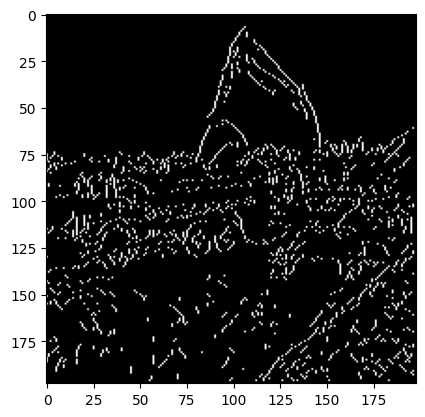

In [ ]:
def double_threshold(Img_nms, lowerTh_ratio=0.05, highTh_ratio=0.09):
  highThreshold = np.max(Img_nms)* highTh_ratio
  lowThhreshold = np.max(Img_nms)*lowerTh_ratio
  print("High threshold: ", highThreshold," low threshold: ", lowThhreshold )
  weak = np.int32(25)
  strong = np.int32(255)
  res = np.zeros(shape = (Img_nms.shape[0], Img_nms.shape[1]), dtype=np.int32)
  strong_i, storng_j = np.where(Img_nms>highThreshold)
  low_i, low_j = np.where(Img_nms<lowThhreshold)
  weak_i, weak_j = np.where((lowThhreshold<Img_nms) & (Img_nms<highThreshold))
  res[strong_i, storng_j] = strong
  res[weak_i, weak_j] = weak
  res[low_i, low_j] = 0
  return res, strong, weak

def hysthresis(res, strong, weak):
  for i in range(1, res.shape[0]-1):
    for j in range(1, res.shape[1]-1):
      if (res[i,j] == weak):
        try:
          if((res[i-1,j-1] == strong) or (res[i,j-1] == strong) or (res[i+1,j-1] == strong)
            or (res[i-1,j] == strong) or  (res[i+1,j] == strong)
            or  (res[i-1,j+1] == strong) or (res[i,j+1] == strong) or (res[i+1,j+1] == strong)):
            res[i,j] = strong
          else:
            res[i,j] = 0
        except IndexError as e:
          pass
  return res

res, strong, weak = double_threshold(Img_nms)
res = hysthresis(res, strong, weak)

plt.imshow(res, cmap='gray')

In [ ]:
i, j = np.where((255>Img_nms) & (Img_nms>100))

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


**Histogram Equalizatio**

[link for Refrence](https://levelup.gitconnected.com/introduction-to-histogram-equalization-for-digital-image-enhancement-420696db9e43?gi=c3656113091f)

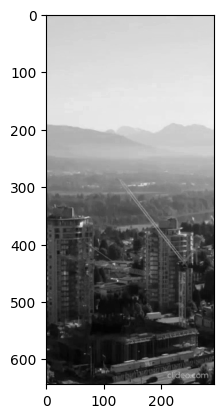

In [ ]:
img_path = '/content/drive/MyDrive/Colab Notebooks/TDB (training)/Construction/building_frames/100.jpg'
Img = Image.open(img_path)
Img = Img.convert(mode='L')
Img = np.array(Img)
plt.imshow(Img, cmap='gray')

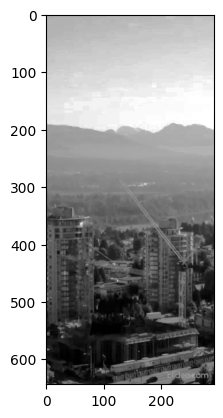

In [ ]:
###### perform Histogram equalization ###
histogram  = np.bincount(Img.flatten(),minlength=255)
img_num_pixels  = histogram.sum()
normalize_hist = histogram / img_num_pixels

cumulitive_hist = np.cumsum(normalize_hist)

##### look-up table  ####

transfrom_function = np.floor(255 * cumulitive_hist).astype(np.uint8)

##### transformation ###

hist_equalized_img = transfrom_function[Img]

plt.imshow(hist_equalized_img, cmap = 'gray')

**PCA**

[Reference link](https://towardsdatascience.com/a-step-by-step-implementation-of-principal-component-analysis-5520cc6cd598)

In [ ]:
import numpy.random as rnd
mu = np.array([10,13])
sigma = np.array([[3.5, -1.8], [-1.8,3.5]])

print(mu.shape)
print(sigma.shape)

### create 1000 samples using mean and sigma
org_data = rnd.multivariate_normal(mu, sigma, size=(1000))
print(org_data)

(2,)
(2, 2)
[[11.45557812 12.98828075]
 [ 9.57872547 11.75743773]
 [11.28905859 10.27847296]
 ...
 [ 8.49594862 14.71281667]
 [ 8.14320742 17.10972018]
 [13.04578466 11.11587098]]


In [ ]:
mean = org_data.mean(axis=0)

mean_data = org_data-mean

###### covariance matrix ####
cov = (1/mean_data.shape[0])*np.dot(mean_data.T, mean_data)
print(cov)

[[ 3.63292445 -1.94532281]
 [-1.94532281  3.62902069]]


In [ ]:
###### get eigen values ######
from numpy import linalg
eig_val, eigen_vec = linalg.eig(cov)
print(eig_val)
print(eigen_vec)

##### sort eigen values and corresponding eigen vectors

[5.57629636 1.68564879]
[[ 0.70746144  0.70675195]
 [-0.70675195  0.70746144]]


In [ ]:
indices = np.arange(0,len(eig_val), 1)
indices = [x for _, x in sorted(zip(eig_val, indices))]
eig_val_sort = eig_val[indices ]
eigen_vec_sort = eigen_vec[indices]
# print(eigen_vec_sort)

#### transfromed vector
pca_data = np.dot(mean_data, eigen_vec_sort[:,0])
# print(pca_data.shape)

######Reconstructed vectors
reconstructed_data = np.dot(pca_data.reshape(1000,1), eigen_vec_sort[:,0].reshape(1,2))+mean
print(reconstructed_data.shape )

(1000, 2)


**Image translation and rotation**

[ref link](https://medium.com/@bosssds65/translation-image-using-translation-matrix-with-python-d5d2b580d963)

In [ ]:
img_path = '/content/drive/MyDrive/Colab Notebooks/TDB (training)/Construction/building_frames/100.jpg'
Img1 = Image.open(img_path)
Img1 = Img1.convert(mode='L')
Img1 = np.array(Img1)

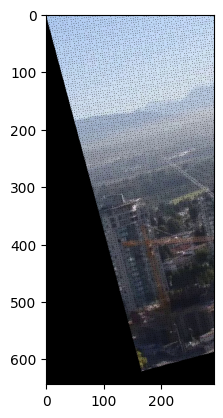

In [ ]:
#### create transform matrix ###
angle = np.pi*15/180
rotate = np.array([[ np.cos(angle),-np.sin(angle), 0],
                  [np.sin(angle), np.cos(angle), 0],
                  [             0,             0, 1]])
translate = np.array([[ 1, 0, 2],
                     [ 0, 1, 2],
                     [ 0, 0, 1]])
out_img = np.zeros(shape=Img1.shape, dtype=np.uint8)
for i in range(Img1.shape[0]):
  for j in range(Img1.shape[1]):
    img_cordinate = np.array([i,j, 1])
    img_trans_cordinate = np.dot(rotate, img_cordinate)
    try:
      x1 = int(img_trans_cordinate[0])
      y1 = int(img_trans_cordinate[1])
      # print(x1, y1, "-----", i, j)
      if (0<x1<Img1.shape[0]) and (0<y1<Img1.shape[1]):
        out_img[x1, y1] = Img1[i,j]
        # print(out_img[x1, y1],"-----", Img1[i,j])
    except Exception as e:
      print(e)


plt.imshow(out_img, cmap='gray')

In [ ]:
labels = [0,0]
print(len(labels))

2
